<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/334_training_YOLO_V8_EM_platelets_converted_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [4]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.73M/6.73M [00:00<00:00, 313MB/s]


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/data.yaml

train: /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/train/images
val: /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/valid/images
test: /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/test/images

nc: 6
names: ['flat_ng', 'flat_ok', 'hollow_nut_ng', 'hollow_nut_ok', 'plate_nut_ng', 'plate_nut_ok']

roboflow:
  workspace: dl-ncgym
  project: thk_shs_high_diagonal
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/dl-ncgym/thk_shs_high_diagonal/dataset/1

**Train the model**

In [ ]:
project = "/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results"
name = "200_epochs-"

In [ ]:
# Train the model
results = model.train(data='/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/data.yaml',
                      project=project,
                      name=name,
                      epochs=400,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      # imgsz=800
                      )

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/data.yaml, epochs=400, time=None, patience=0, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results, name=200_epochs-3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

train: Scanning /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/train/labels.cache... 171 images, 0 backgrounds, 0 corrupt: 100%|██████████| 171/171 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3
Starting training for 400 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/400      1.11G     0.8535      1.352      1.078      1.173         12        640: 100%|██████████| 43/43 [00:09<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         16         23      0.849      0.825      0.836       0.73      0.849      0.825      0.836      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/400      1.05G     0.8965       1.32      1.148        1.2          7        640: 100%|██████████| 43/43 [00:09<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         16         23      0.863      0.815      0.874      0.761      0.863      0.815      0.874      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/400      1.04G     0.9658      1.418      1.228      1.198         11        640: 100%|██████████| 43/43 [00:06<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         16         23      0.853      0.847      0.787       0.68      0.853      0.847      0.787      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/400      1.05G     0.9701      1.421      1.243      1.226          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         16         23      0.803      0.837      0.776      0.665      0.803      0.837      0.776      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/400      1.04G     0.9117      1.344      1.168      1.183          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         16         23      0.719      0.751      0.783      0.656      0.719      0.751      0.783      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/400      1.16G     0.9607      1.483      1.323      1.243         10        640: 100%|██████████| 43/43 [00:06<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         16         23      0.843      0.882       0.88      0.708      0.843      0.882       0.88      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/400      1.04G     0.9717      1.399      1.206      1.221         12        640: 100%|██████████| 43/43 [00:08<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         16         23      0.766      0.847      0.867      0.675      0.766      0.847      0.867      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/400      1.05G     0.9818      1.428      1.204       1.23          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]


                   all         16         23      0.749      0.789      0.848      0.704      0.749      0.789      0.848      0.625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/400      1.04G     0.9895      1.422      1.275      1.277         11        640: 100%|██████████| 43/43 [00:06<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         16         23       0.83      0.833      0.874      0.728       0.83      0.833      0.874      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/400      1.05G      1.041      1.459       1.28      1.253         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         16         23      0.817      0.817      0.861      0.678      0.817      0.817      0.861      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/400      1.05G     0.8898       1.38      1.101      1.176         10        640: 100%|██████████| 43/43 [00:06<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         16         23      0.769      0.847      0.857      0.696      0.769      0.847      0.857       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/400      1.16G      0.977      1.382       1.12      1.191         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         16         23      0.885      0.847      0.857      0.692      0.885      0.847      0.857      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/400      1.16G     0.9221       1.34       1.18      1.227          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         16         23       0.76      0.847      0.769       0.64       0.76      0.847      0.769      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/400      1.05G     0.9629      1.365      1.194      1.249         11        640: 100%|██████████| 43/43 [00:06<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         16         23      0.776      0.847      0.727      0.596      0.776      0.847      0.727      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/400      1.01G     0.9993      1.368      1.192      1.238          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         16         23      0.778      0.782      0.748      0.608      0.778      0.782      0.748      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/400      0.99G     0.9503      1.334      1.194      1.269         15        640: 100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         16         23      0.829      0.755       0.83      0.693      0.829      0.755       0.83      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/400      1.01G     0.9851      1.472      1.179      1.239          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         16         23      0.892      0.839      0.879      0.765      0.892      0.839      0.879      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/400      1.01G     0.8706      1.286      1.071      1.181          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         16         23      0.689      0.875       0.86      0.712      0.689      0.875       0.86      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/400      1.01G     0.9532      1.371      1.186      1.223          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         16         23      0.823      0.847      0.846      0.713      0.823      0.847      0.846       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/400      1.01G     0.9489      1.364      1.128      1.218          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         16         23      0.848      0.889      0.861      0.727      0.848      0.889      0.861      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/400      1.12G     0.9305      1.359       1.06       1.18          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         16         23      0.776      0.818      0.858      0.724      0.776      0.818      0.858      0.622

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/400     0.988G     0.9732      1.368      1.131      1.255          4        640: 100%|██████████| 43/43 [00:06<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         16         23      0.874       0.75      0.873      0.744      0.874       0.75      0.873      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/400      1.01G     0.8774      1.298      1.036      1.165          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         16         23      0.729      0.853      0.786      0.673      0.729      0.853      0.786      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/400      1.01G     0.8927      1.313      1.019      1.162         13        640: 100%|██████████| 43/43 [00:07<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         16         23      0.659      0.845      0.757      0.634      0.659      0.845      0.757      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/400      1.01G     0.9259      1.275      1.137      1.206          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         16         23      0.594      0.835      0.733      0.613      0.594      0.835      0.733       0.62

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/400      1.01G     0.9696      1.386      1.183      1.245          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         16         23      0.774      0.847      0.873       0.74      0.774      0.847      0.873      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/400      1.01G     0.9753      1.328       1.16      1.236          6        640: 100%|██████████| 43/43 [00:06<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         16         23      0.797      0.863      0.871      0.702       0.69      0.874      0.789      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/400      0.99G     0.9001      1.277      1.071      1.195          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]


                   all         16         23      0.814      0.847      0.859      0.658       0.91      0.681      0.717      0.587

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/400     0.988G      0.833      1.216      1.052      1.178          4        640: 100%|██████████| 43/43 [00:07<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         16         23      0.764      0.847      0.866      0.659      0.764      0.847      0.866      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/400      1.12G     0.8565      1.276     0.9852      1.172          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         16         23        0.8      0.872      0.871      0.712        0.8      0.872      0.871      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/400      1.12G     0.9029      1.262      1.029      1.219          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         16         23      0.768      0.847      0.864      0.774      0.632      0.829      0.781      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/400     0.988G     0.8677      1.277      1.035      1.185          9        640: 100%|██████████| 43/43 [00:06<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         16         23      0.785      0.847      0.869      0.751      0.785      0.847      0.869      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/400      1.01G     0.8924      1.285      1.042      1.204          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         16         23      0.769      0.847      0.849      0.726      0.769      0.847      0.849       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/400      1.01G     0.8549      1.212     0.9771      1.164         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         16         23      0.764      0.847      0.845      0.757      0.764      0.847      0.845      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/400      1.01G      0.923        1.4      1.097      1.246         14        640: 100%|██████████| 43/43 [00:07<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         16         23      0.708      0.845      0.759      0.674      0.708      0.845      0.759      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/400      1.01G     0.9764      1.496      1.123      1.234          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         16         23      0.753      0.847      0.853      0.744      0.753      0.847      0.853      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/400      1.01G     0.8901      1.324      1.099      1.247          9        640: 100%|██████████| 43/43 [00:07<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         16         23      0.778      0.847      0.868      0.738      0.778      0.847      0.868      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/400     0.988G     0.8838      1.354     0.9677      1.135         12        640: 100%|██████████| 43/43 [00:07<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         16         23      0.838      0.862      0.862      0.732      0.838      0.862      0.862      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/400      1.01G     0.8611      1.334      1.058      1.201          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         16         23      0.833      0.889      0.862      0.727      0.679      0.871       0.78      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/400      1.01G     0.8667      1.292      1.051      1.173          9        640: 100%|██████████| 43/43 [00:06<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         16         23      0.859      0.874      0.874      0.723      0.859      0.874      0.874      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/400      1.01G     0.9342      1.426      1.099      1.201          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         16         23      0.731      0.832      0.865      0.728      0.731      0.832      0.865      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/400      1.01G     0.8609      1.297      1.007      1.148          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         16         23      0.819      0.843      0.878      0.766      0.819      0.843      0.878      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/400      1.03G     0.8715      1.339     0.9865      1.195          8        640: 100%|██████████| 43/43 [00:07<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         16         23      0.783      0.847      0.856      0.732      0.783      0.847      0.856      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/400      1.01G     0.8427      1.243     0.8926      1.119          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         16         23      0.737      0.847      0.762      0.654      0.737      0.847      0.762      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/400      1.01G     0.8836      1.241       1.02      1.181          8        640: 100%|██████████| 43/43 [00:06<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         16         23      0.841      0.847      0.846      0.673      0.841      0.847      0.846      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/400      1.03G      0.861      1.236      0.961      1.181         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         16         23      0.858      0.847      0.843      0.693      0.858      0.847      0.843      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/400      0.99G     0.8455      1.279     0.9874      1.154          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         16         23      0.835      0.847      0.862      0.741      0.835      0.847      0.862      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/400      1.01G     0.7727      1.212     0.9102      1.102          9        640: 100%|██████████| 43/43 [00:06<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]


                   all         16         23      0.759      0.847      0.861      0.761      0.759      0.847      0.861      0.651

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/400      1.01G     0.7957      1.176     0.8758      1.139          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


                   all         16         23      0.816      0.847      0.834      0.743      0.816      0.847      0.834      0.599

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/400      1.01G     0.8281      1.183     0.8999      1.157          6        640: 100%|██████████| 43/43 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         16         23      0.831      0.818      0.859      0.731      0.831      0.818      0.859      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/400     0.988G     0.8374      1.197     0.8836      1.138         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         16         23      0.868      0.748      0.866      0.693      0.868      0.748      0.866      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/400     0.988G     0.8526      1.201     0.9446      1.143          4        640: 100%|██████████| 43/43 [00:08<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         16         23      0.863      0.858      0.868      0.722      0.863      0.858      0.868      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/400      1.01G     0.8437      1.285     0.9433      1.139          6        640: 100%|██████████| 43/43 [00:06<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         16         23      0.842      0.868       0.86      0.755      0.842      0.868       0.86      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/400      0.99G     0.8486      1.266     0.9091      1.139          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         16         23       0.84      0.787      0.852      0.741       0.84      0.787      0.852      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/400      1.01G       0.84      1.279     0.9293       1.16          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         16         23      0.817      0.847      0.865      0.717      0.817      0.847      0.865      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/400      1.01G     0.8658      1.329      1.001      1.165          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         16         23      0.824      0.837      0.864      0.697      0.824      0.837      0.864      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/400     0.988G     0.9101      1.416      1.038      1.201          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         16         23      0.899      0.842      0.851      0.704      0.899      0.842      0.851      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/400      1.03G     0.8511      1.287     0.8843      1.162          5        640: 100%|██████████| 43/43 [00:06<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         16         23      0.857      0.847      0.849      0.697      0.857      0.847      0.849      0.748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/400      1.01G     0.8366       1.26     0.8999       1.14          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         16         23      0.734      0.843      0.752      0.641      0.734      0.843      0.752       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/400      1.01G     0.8538      1.226     0.9369      1.182          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         16         23      0.685      0.813      0.749      0.645      0.685      0.813      0.749       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/400      1.12G     0.8921      1.417     0.9778      1.198         10        640: 100%|██████████| 43/43 [00:06<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         16         23       0.76      0.838      0.761      0.663       0.76      0.838      0.761      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/400      1.01G     0.7988      1.179     0.8666      1.124          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         16         23      0.844      0.847      0.863      0.772      0.844      0.847      0.863      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/400      1.01G     0.8051      1.227     0.8877      1.113          6        640: 100%|██████████| 43/43 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         16         23      0.839      0.863      0.876      0.731      0.839      0.863      0.876      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/400     0.988G     0.8488      1.297     0.8786      1.147          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         16         23      0.801      0.885      0.862      0.712      0.863      0.702       0.73       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/400      1.03G     0.8294      1.314     0.8946      1.159          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         16         23      0.791      0.847      0.871      0.722      0.791      0.847      0.871      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/400      1.01G     0.8121      1.234     0.9184      1.159          3        640: 100%|██████████| 43/43 [00:06<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         16         23      0.828      0.847      0.878      0.755      0.828      0.847      0.878      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/400      1.01G     0.8433      1.235     0.9009      1.163          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         16         23      0.861      0.847      0.878      0.792      0.861      0.847      0.878      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/400     0.988G      0.847      1.217     0.8709      1.131          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         16         23      0.899      0.847      0.873      0.804      0.899      0.847      0.873      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/400      1.03G     0.7711      1.152     0.8154      1.109          8        640: 100%|██████████| 43/43 [00:06<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         16         23      0.917      0.847      0.872      0.786      0.917      0.847      0.872      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/400      0.99G     0.8102      1.179     0.8471      1.106          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         16         23      0.776      0.867       0.87      0.739      0.776      0.867       0.87      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/400      1.01G     0.8379      1.215      0.878      1.155         10        640: 100%|██████████| 43/43 [00:06<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         16         23      0.862      0.847      0.864      0.724      0.862      0.847      0.864      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/400      1.13G     0.8204       1.17     0.9058      1.136         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         16         23      0.853       0.87      0.866      0.752      0.853       0.87      0.866      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/400      1.01G      0.859      1.213     0.8191      1.147          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         16         23      0.826      0.877      0.858      0.745      0.826      0.877      0.858      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/400      1.01G     0.7926      1.214     0.8943      1.122          6        640: 100%|██████████| 43/43 [00:06<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         16         23      0.822      0.847      0.861      0.747      0.822      0.847      0.861      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/400     0.988G      0.789      1.188     0.8055      1.109         12        640: 100%|██████████| 43/43 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         16         23      0.883      0.824      0.864        0.7      0.883      0.824      0.864      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/400      1.01G     0.7681       1.17     0.8067      1.102          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         16         23      0.886       0.82      0.855      0.698      0.886       0.82      0.855      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/400      1.01G     0.7589       1.12     0.7812      1.111         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         16         23      0.844      0.835      0.877      0.769      0.844      0.835      0.877      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/400      1.01G     0.7751      1.171     0.7657      1.082          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         16         23      0.895      0.836       0.88       0.79      0.895      0.836       0.88      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/400      1.01G     0.8384      1.237     0.8668      1.134          7        640: 100%|██████████| 43/43 [00:06<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         16         23        0.9      0.852      0.879      0.777        0.9      0.852      0.879      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/400      1.15G     0.7963      1.182     0.8203      1.127          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         16         23      0.901      0.853      0.879      0.768      0.901      0.853      0.879      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/400      1.01G     0.8021      1.214     0.7894      1.114         15        640: 100%|██████████| 43/43 [00:08<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         16         23      0.849      0.853      0.877      0.764      0.849      0.853      0.877      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/400      1.12G     0.8092      1.237     0.8257       1.13         10        640: 100%|██████████| 43/43 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         16         23      0.826      0.864      0.877      0.759      0.826      0.864      0.877      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/400     0.988G     0.8107      1.167     0.7977      1.108         12        640: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         16         23      0.833      0.865      0.876      0.759      0.833      0.865      0.876        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/400      1.12G     0.7719      1.155     0.8297      1.114          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


                   all         16         23      0.876      0.855      0.878      0.766      0.876      0.855      0.878      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/400      1.01G     0.7619      1.163     0.7456      1.093         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         16         23      0.856       0.84      0.879      0.757      0.856       0.84      0.879      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/400      1.01G     0.8002      1.149     0.8494      1.103         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         16         23      0.905      0.823      0.879       0.74      0.905      0.823      0.879      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/400      1.01G     0.8137      1.153     0.8281      1.091          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         16         23      0.906      0.847      0.874      0.767      0.906      0.847      0.874      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/400      1.01G     0.7768      1.271     0.8217      1.098          5        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         16         23      0.874      0.852      0.874      0.743      0.874      0.852      0.874      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/400      1.12G     0.8023      1.193     0.8478      1.116          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         16         23       0.87      0.847      0.871      0.743       0.87      0.847      0.871      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/400      1.01G     0.7659      1.157     0.8192      1.083          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         16         23      0.863      0.842      0.874      0.761      0.863      0.842      0.874      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/400      1.13G     0.8163      1.193     0.8408      1.134         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         16         23      0.899      0.847      0.865      0.755      0.899      0.847      0.865      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/400      1.01G     0.8004      1.158     0.7865      1.099         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         16         23      0.849      0.847      0.874       0.76      0.849      0.847      0.874      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/400      1.01G     0.8184       1.27     0.8429      1.142          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         16         23      0.865      0.847      0.859      0.758      0.865      0.847      0.859      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/400      0.99G     0.8128      1.234     0.8319      1.149          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         16         23      0.866        0.8      0.876      0.742      0.866        0.8      0.876      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/400      1.12G     0.7827      1.202     0.7548      1.111         11        640: 100%|██████████| 43/43 [00:07<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         16         23      0.873      0.809      0.875      0.738      0.873      0.809      0.875      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/400      1.12G     0.7495       1.09     0.7013      1.075         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         16         23       0.92      0.843      0.886      0.719       0.92      0.843      0.886      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/400      1.01G     0.7675      1.074     0.7562      1.113         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         16         23      0.886      0.861      0.884      0.785      0.886      0.861      0.884      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/400     0.988G     0.8011       1.18     0.8736       1.14          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         16         23      0.871       0.87      0.877      0.756      0.871       0.87      0.877       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/400      0.99G     0.8216      1.166      0.809      1.127          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         16         23      0.862      0.869      0.879      0.747      0.862      0.869      0.879      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/400     0.988G     0.7824       1.11     0.7611      1.135          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         16         23      0.803      0.847      0.873      0.752      0.803      0.847      0.873      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/400      0.99G     0.8057      1.132     0.7866      1.128          9        640: 100%|██████████| 43/43 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         16         23      0.815      0.847      0.874      0.735      0.943      0.665      0.741      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/400      1.01G     0.8229      1.188      0.786      1.134          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         16         23      0.808      0.847      0.872      0.717      0.808      0.847      0.872      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/400      1.01G     0.7988      1.203     0.8016      1.101          7        640: 100%|██████████| 43/43 [00:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         16         23      0.861      0.847      0.874      0.767      0.861      0.847      0.874      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/400      1.12G     0.7767      1.143     0.7422      1.133          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         16         23      0.836      0.847       0.88      0.774      0.836      0.847       0.88      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/400      1.13G     0.7967      1.251     0.8055      1.142         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         16         23      0.819      0.872      0.886      0.778      0.819      0.872      0.886      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/400      1.01G     0.8039      1.195     0.7856      1.146          8        640: 100%|██████████| 43/43 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         16         23      0.807      0.889      0.798      0.679      0.807      0.889      0.798      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/400      1.12G     0.7727      1.168     0.7689      1.125         12        640: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         16         23      0.791      0.847      0.771      0.664      0.791      0.847      0.771      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/400     0.988G     0.6994      1.044     0.7065      1.065         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         16         23      0.848      0.847      0.797      0.684      0.848      0.847      0.797      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/400      1.01G     0.7814      1.135     0.7196      1.086          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         16         23      0.894      0.847      0.875      0.769      0.894      0.847      0.875      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/400     0.988G     0.7351      1.157     0.7244      1.093          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]


                   all         16         23      0.887      0.847       0.88      0.759      0.887      0.847       0.88      0.637

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/400      1.01G     0.7831      1.125     0.7371      1.101          7        640: 100%|██████████| 43/43 [00:06<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         16         23      0.924      0.847       0.88      0.751      0.924      0.847       0.88      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/400      1.01G     0.7547      1.134     0.7521      1.075          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         16         23      0.889      0.847      0.877       0.77      0.889      0.847      0.877      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/400      1.13G     0.7633      1.124     0.7639      1.115         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         16         23      0.885      0.847      0.869      0.754      0.885      0.847      0.869      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/400     0.988G     0.7598      1.145     0.7241       1.09          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         16         23      0.876      0.847      0.849      0.745      0.876      0.847      0.849      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/400      1.01G     0.6838      1.111     0.6996      1.073          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         16         23      0.878       0.85      0.855      0.747      0.878       0.85      0.855       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/400      1.03G     0.7706      1.128     0.7337      1.106          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         16         23      0.851      0.847      0.875      0.773      0.851      0.847      0.875      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/400      1.01G     0.7136      1.037     0.6768      1.083          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         16         23      0.844      0.851       0.88      0.783      0.844      0.851       0.88      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/400      1.03G     0.6952      1.032     0.7313       1.08          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         16         23      0.802       0.86      0.882       0.78      0.802       0.86      0.882       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/400      0.99G     0.7573      1.112     0.7426      1.101          6        640: 100%|██████████| 43/43 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         16         23      0.829      0.847      0.854      0.757      0.829      0.847      0.854      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/400      1.12G     0.7221      1.102     0.7126      1.078          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         16         23      0.808      0.847      0.839      0.735      0.808      0.847      0.839      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/400      1.01G     0.7583      1.203     0.7466      1.105          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         16         23      0.827      0.847      0.822      0.719      0.827      0.847      0.822      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/400      1.03G     0.7315      1.108     0.6807      1.065         13        640: 100%|██████████| 43/43 [00:07<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         16         23      0.832      0.847      0.829      0.704      0.832      0.847      0.829      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/400      1.01G     0.7266      1.092     0.6638      1.057          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         16         23      0.803      0.765      0.866      0.746      0.803      0.765      0.866      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/400      1.03G     0.7251      1.169     0.7464      1.105          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         16         23      0.807      0.766       0.87      0.741      0.807      0.766       0.87      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/400      1.01G     0.8035      1.206       0.76      1.082         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         16         23      0.818      0.813      0.861      0.745      0.818      0.813      0.861      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/400      1.01G     0.7296      1.104     0.7451      1.091         12        640: 100%|██████████| 43/43 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         16         23      0.867      0.847       0.87      0.765      0.867      0.847       0.87      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/400      1.13G     0.7323      1.023     0.7238      1.096          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         16         23      0.837      0.847       0.86      0.759      0.837      0.847       0.86      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/400      1.01G     0.7608       1.14     0.7122      1.096          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         16         23      0.733      0.847      0.865      0.772      0.733      0.847      0.865      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/400      1.01G     0.8053      1.159     0.6967      1.114         13        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         16         23      0.735      0.847      0.796      0.695      0.735      0.847      0.796      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/400      1.01G      0.743      1.083     0.7017      1.096         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         16         23      0.808      0.847      0.879      0.747      0.808      0.847      0.879      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/400      1.01G     0.7443      1.132     0.7179        1.1          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         16         23      0.859       0.87      0.875       0.73      0.859       0.87      0.875      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/400      1.01G     0.7074       1.19     0.7018      1.086         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         16         23      0.867      0.847      0.857      0.738      0.867      0.847      0.857      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/400      1.01G     0.7377      1.155     0.7727      1.106         16        640: 100%|██████████| 43/43 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]


                   all         16         23      0.866      0.847      0.852      0.737      0.866      0.847      0.852      0.628

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/400      1.01G     0.6606      1.077     0.6343      1.048         13        640: 100%|██████████| 43/43 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         16         23      0.858      0.847      0.856      0.727      0.858      0.847      0.856      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/400      0.99G     0.7435      1.093     0.7165      1.074         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         16         23      0.809      0.847      0.857       0.75      0.809      0.847      0.857       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/400      1.01G     0.7607      1.101     0.7478      1.101          5        640: 100%|██████████| 43/43 [00:07<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         16         23      0.798      0.852      0.849      0.741      0.798      0.852      0.849       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/400      1.01G      0.739      1.068     0.7142      1.084          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         16         23      0.794      0.869      0.859      0.725      0.794      0.869      0.859      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/400      1.01G     0.7632      1.086     0.7211      1.086          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         16         23      0.812       0.87      0.878       0.75      0.812       0.87      0.878      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/400      1.01G     0.7896      1.167     0.7754      1.106         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         16         23      0.859      0.889      0.876      0.757      0.859      0.889      0.876      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/400      1.01G     0.6783      1.074     0.6456      1.048          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         16         23      0.862      0.856      0.875      0.762      0.862      0.856      0.875      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/400     0.988G      0.756      1.065     0.6774      1.094         12        640: 100%|██████████| 43/43 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         16         23      0.865      0.858      0.876      0.774      0.865      0.858      0.876      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/400      1.01G     0.7723      1.174     0.7115      1.128         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         16         23      0.837      0.847      0.862      0.737      0.837      0.847      0.862       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/400      1.01G     0.6741      1.033     0.7259      1.074          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         16         23      0.808      0.847      0.862      0.737      0.808      0.847      0.862      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/400      1.01G     0.7425      1.125     0.7065      1.097          5        640: 100%|██████████| 43/43 [00:07<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         16         23      0.844      0.885       0.87      0.731      0.659      0.873      0.787      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/400      1.01G      0.733      1.136     0.7116      1.071          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         16         23      0.902      0.844       0.88      0.745      0.902      0.844       0.88      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/400      1.12G     0.7251      1.071     0.6789      1.102          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         16         23      0.893      0.822      0.872      0.754      0.893      0.822      0.872      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/400      1.01G     0.7565      1.116     0.7276      1.098          9        640: 100%|██████████| 43/43 [00:07<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         16         23      0.884      0.843      0.868      0.745      0.884      0.843      0.868      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/400      1.03G     0.7502      1.094     0.7089      1.077         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         16         23      0.794      0.869      0.868      0.727      0.794      0.869      0.868      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/400      1.01G     0.7227      1.111     0.6804      1.062          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         16         23      0.867      0.858       0.88      0.757      0.867      0.858       0.88       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/400      1.01G     0.7431      1.043     0.6886      1.098         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         16         23      0.819      0.847      0.875      0.771      0.819      0.847      0.875      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/400     0.988G      0.686      1.059     0.6865      1.067         12        640: 100%|██████████| 43/43 [00:08<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         16         23      0.854      0.847      0.875      0.765      0.854      0.847      0.875      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/400      1.01G     0.6777       1.08     0.6807      1.078          8        640: 100%|██████████| 43/43 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         16         23      0.862      0.847      0.875      0.737      0.862      0.847      0.875      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/400      1.01G      0.721      1.095     0.6559      1.076         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         16         23      0.878       0.84      0.879      0.721       0.72      0.671      0.737      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/400      1.15G     0.6989      1.035     0.6721      1.091          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         16         23      0.871      0.847      0.882      0.746      0.871      0.847      0.882      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/400     0.988G       0.66      1.017     0.6523      1.033          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         16         23      0.817      0.847      0.882      0.756      0.817      0.847      0.882      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/400      1.12G     0.7241      1.101     0.6849      1.063         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         16         23      0.794      0.847       0.88      0.775      0.794      0.847       0.88      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/400      0.99G     0.7106      1.042     0.6794      1.062          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         16         23      0.711      0.853      0.796      0.692      0.711      0.853      0.796      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/400      1.01G     0.7064      1.026     0.6646      1.058          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]


                   all         16         23      0.748      0.847      0.885      0.772      0.748      0.847      0.885       0.66

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/400      1.01G     0.6256     0.9343     0.5777      1.015          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         16         23       0.79      0.847       0.89      0.761       0.79      0.847       0.89      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/400      1.01G     0.6583      1.038     0.6177       1.05         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         16         23      0.887      0.847      0.885      0.764      0.887      0.847      0.885      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/400      1.01G     0.6782      0.987     0.6202      1.033          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         16         23      0.867      0.854      0.885      0.773      0.867      0.854      0.885       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/400      1.01G     0.6488     0.9455     0.6239      1.022          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         16         23       0.85      0.863      0.882      0.803       0.85      0.863      0.882      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/400     0.988G     0.6719      1.044     0.6312      1.048          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         16         23      0.849      0.863       0.88      0.771      0.849      0.863       0.88       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/400      1.12G     0.7088      1.046     0.6505      1.045          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         16         23      0.843       0.86      0.872      0.764      0.843       0.86      0.872      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/400     0.988G     0.7227      1.033     0.6494      1.058          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         16         23      0.827      0.847      0.866      0.743      0.827      0.847      0.866      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/400      1.01G     0.6799     0.9688     0.6356      1.071          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]


                   all         16         23      0.822      0.847      0.881      0.748      0.822      0.847      0.881      0.634

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/400      1.01G     0.7053      1.012     0.6478      1.036          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         16         23      0.811      0.847      0.876      0.735      0.811      0.847      0.876      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/400      1.01G     0.6831      1.075     0.6248       1.03         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         16         23      0.795      0.847      0.873      0.735      0.638      0.832       0.79      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/400      1.01G     0.6616      1.067     0.6568      1.051         11        640: 100%|██████████| 43/43 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]


                   all         16         23      0.798      0.847      0.873      0.731      0.649      0.833       0.79      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/400      1.01G     0.6851      1.059     0.6215      1.059          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]


                   all         16         23      0.751      0.847      0.796      0.674      0.951      0.681      0.768      0.643

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/400      1.01G      0.685     0.9819     0.6309      1.025          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         16         23      0.762      0.844      0.797      0.711      0.762      0.844      0.797      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/400      1.01G     0.6632          1     0.6467      1.035          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         16         23      0.749      0.836      0.803      0.702      0.932      0.681      0.761       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/400      1.03G     0.6533     0.9557     0.6261      1.024          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         16         23      0.772      0.847      0.878      0.746      0.772      0.847      0.878      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/400     0.988G     0.6289     0.9564     0.5669      1.017          4        640: 100%|██████████| 43/43 [00:07<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         16         23      0.798      0.847      0.868       0.73      0.798      0.847      0.868       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/400     0.988G     0.6669      1.039     0.6158       1.05          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         16         23      0.837      0.847      0.866      0.745      0.837      0.847      0.866      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/400     0.988G     0.6888      1.046     0.5928      1.026         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         16         23      0.848      0.862      0.868      0.733      0.848      0.862      0.868      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/400      1.01G     0.6467      1.051     0.6371      1.034          7        640: 100%|██████████| 43/43 [00:07<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         16         23      0.838      0.868      0.877       0.74      0.838      0.868      0.877      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/400     0.988G     0.7044      1.063      0.652       1.07         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         16         23      0.834      0.868      0.878      0.763      0.834      0.868      0.878      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/400     0.986G     0.6652     0.9705     0.5914      1.021          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         16         23      0.829      0.867       0.88      0.756      0.671      0.866      0.797      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/400      1.01G     0.6559     0.9985     0.5654      1.046          6        640: 100%|██████████| 43/43 [00:07<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         16         23      0.844       0.86      0.882      0.758      0.844       0.86      0.882      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/400      1.01G     0.6913     0.9764     0.6318      1.063         15        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         16         23      0.832      0.857      0.882      0.762      0.832      0.857      0.882      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/400      1.01G     0.6693      1.018     0.6271      1.063          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


                   all         16         23      0.818      0.858       0.87      0.733      0.818      0.858       0.87      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/400      1.01G      0.632     0.9418     0.5925      1.031          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         16         23      0.823      0.861       0.87      0.742      0.889      0.685      0.746      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/400      1.03G     0.6845      1.071     0.6145      1.056          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         16         23      0.762      0.863      0.789      0.684       0.89      0.685      0.747      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/400      1.01G     0.6801      1.054     0.6337      1.049          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


                   all         16         23      0.835      0.866      0.872      0.738      0.835      0.866      0.872      0.624

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/400     0.988G     0.7004      1.045      0.639      1.056          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         16         23      0.828      0.863      0.861      0.755      0.646       0.86      0.751      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/400      1.01G     0.6783     0.9865     0.6334       1.03          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         16         23      0.825      0.861       0.88      0.767      0.825      0.861       0.88      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/400      1.03G     0.6704     0.9872      0.585      1.015         14        640: 100%|██████████| 43/43 [00:07<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         16         23      0.808      0.858      0.878      0.746      0.808      0.858      0.878      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/400      1.01G     0.6522      1.006     0.6016      1.029          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         16         23      0.783      0.847      0.858      0.759      0.783      0.847      0.858      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/400      1.13G     0.6702      1.005       0.59       1.04          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         16         23      0.776      0.847      0.859       0.75      0.776      0.847      0.859      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/400      1.01G       0.64     0.9728     0.5827      1.023         13        640: 100%|██████████| 43/43 [00:07<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         16         23      0.841      0.847      0.866       0.76      0.841      0.847      0.866      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/400      1.01G     0.6675      1.023     0.6318      1.045          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         16         23      0.837      0.847      0.875      0.774      0.837      0.847      0.875      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/400      1.13G     0.6682     0.9861     0.5993      1.044          8        640: 100%|██████████| 43/43 [00:07<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         16         23      0.861      0.847      0.876      0.775      0.861      0.847      0.876      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/400      1.01G     0.6527      1.002     0.6099      1.065          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         16         23      0.882      0.847      0.865       0.77      0.882      0.847      0.865      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/400      1.01G     0.6391      0.912      0.577      1.054          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]


                   all         16         23      0.896      0.847      0.873      0.772      0.896      0.847      0.873      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/400      1.01G      0.615     0.8912       0.54      1.006         12        640: 100%|██████████| 43/43 [00:06<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         16         23      0.886      0.852       0.87      0.778      0.886      0.852       0.87      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/400      1.01G     0.6385     0.9975     0.5959      1.036          4        640: 100%|██████████| 43/43 [00:09<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]


                   all         16         23      0.875      0.855       0.87      0.786      0.875      0.855       0.87      0.628

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/400      1.01G     0.6604     0.9941     0.6019      1.021         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         16         23      0.844      0.847      0.868      0.782      0.844      0.847      0.868      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/400      1.03G     0.6047     0.9829     0.5694      1.017          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         16         23      0.842      0.847      0.861      0.768      0.842      0.847      0.861      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/400      1.01G     0.6233     0.9388      0.578      1.032          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


                   all         16         23      0.852      0.847      0.864      0.754      0.852      0.847      0.864      0.615

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/400      1.01G     0.6084     0.9793      0.585      1.023         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         16         23      0.885      0.847      0.902      0.788      0.885      0.847      0.902       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/400      1.01G     0.5995     0.9544     0.5595      1.029         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all         16         23      0.866      0.847      0.878      0.742      0.866      0.847      0.878      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/400     0.988G     0.6256      1.006     0.5827      1.016          4        640: 100%|██████████| 43/43 [00:08<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         16         23      0.862      0.847      0.892      0.798      0.862      0.847      0.892      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/400      1.01G     0.6271     0.9722     0.5611      1.016          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         16         23      0.866      0.847      0.881       0.77      0.866      0.847      0.881      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/400      1.03G     0.6063     0.9523      0.569      1.016         15        640: 100%|██████████| 43/43 [00:07<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         16         23       0.87      0.847      0.868      0.764      0.932      0.681      0.729      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/400      1.01G      0.614     0.9412     0.5505      1.045          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         16         23      0.878      0.847       0.87      0.761      0.878      0.847       0.87      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/400      1.01G      0.669      1.025     0.5976      1.041         14        640: 100%|██████████| 43/43 [00:07<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]


                   all         16         23      0.873      0.847      0.861      0.769      0.873      0.847      0.861      0.642

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/400      1.01G      0.674      1.044     0.5797      1.062          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         16         23      0.836      0.847      0.851      0.759      0.836      0.847      0.851      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/400      1.13G     0.6342     0.8782     0.5698      1.048          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         16         23      0.821      0.847      0.857      0.765      0.821      0.847      0.857      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/400      1.01G     0.6482     0.9648     0.5696      1.028          8        640: 100%|██████████| 43/43 [00:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         16         23      0.797      0.847      0.866      0.756      0.797      0.847      0.866      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/400      1.13G     0.6321     0.9761     0.5876      1.005          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         16         23      0.813      0.875      0.885      0.752      0.813      0.875      0.885      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/400      1.01G     0.6381     0.9371     0.5908      1.004         14        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         16         23       0.83      0.847      0.878      0.785       0.83      0.847      0.878      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/400      1.01G     0.6407     0.9875     0.5585      1.046          6        640: 100%|██████████| 43/43 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         16         23      0.848      0.847      0.847      0.757      0.848      0.847      0.847       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/400      1.01G     0.6459     0.9361     0.5612     0.9963          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         16         23      0.881      0.849      0.847      0.756      0.881      0.849      0.847      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/400      1.12G     0.6351     0.9722     0.6014      1.028          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         16         23      0.894      0.864      0.869       0.76      0.894      0.864      0.869      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/400      1.01G     0.6368     0.8984     0.5836      1.017         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         16         23      0.876      0.864      0.851      0.759      0.876      0.864      0.851      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/400      1.01G     0.7014      1.036     0.6245      1.039          4        640: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         16         23       0.88      0.865      0.862      0.756       0.88      0.865      0.862      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/400      1.01G       0.62     0.9296     0.5729      1.024         13        640: 100%|██████████| 43/43 [00:07<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         16         23      0.861      0.863       0.85      0.754      0.861      0.863       0.85      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/400      1.01G     0.5961     0.9047     0.5401      1.002          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         16         23      0.856      0.858      0.857       0.76      0.856      0.858      0.857      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/400      1.01G     0.6238     0.9779     0.5582       1.02          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         16         23      0.854      0.851      0.868      0.755       0.94      0.681      0.735      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/400      1.01G     0.6442       1.01     0.5732      1.048         14        640: 100%|██████████| 43/43 [00:07<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         16         23      0.786      0.866      0.847      0.697      0.786      0.866      0.847      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/400      0.99G     0.6251     0.9552     0.5754       1.03         14        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         16         23      0.765      0.872      0.863      0.728      0.765      0.872      0.863      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/400      1.01G     0.6632      1.022      0.613     0.9917          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         16         23      0.779       0.87      0.865      0.748      0.779       0.87      0.865      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/400      1.01G     0.5752      0.897     0.5381      1.007          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         16         23      0.751      0.869      0.869      0.745      0.751      0.869      0.869      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/400      1.13G     0.5911     0.9123     0.5548       1.01          4        640: 100%|██████████| 43/43 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         16         23      0.743      0.855      0.879      0.752      0.741      0.855      0.796      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/400      1.01G     0.6523     0.9752     0.5987      1.023         12        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         16         23      0.754      0.847      0.879      0.774      0.754      0.847      0.879      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/400      1.01G     0.6316       0.93     0.6047       1.02         12        640: 100%|██████████| 43/43 [00:07<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         16         23      0.763      0.849      0.868      0.732      0.763      0.849      0.868      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/400      1.12G     0.6383     0.9637     0.5901      1.027          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         16         23      0.776      0.847      0.869      0.758      0.776      0.847      0.869      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/400      1.01G      0.622      0.997     0.5674      1.032         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         16         23      0.783      0.847       0.87      0.752      0.783      0.847       0.87      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/400     0.986G     0.5715     0.9073     0.5513      1.002          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         16         23      0.787      0.847      0.851      0.749      0.787      0.847      0.851      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/400      1.01G     0.6456     0.9502     0.5883      1.048         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         16         23      0.811      0.847      0.847      0.762      0.811      0.847      0.847      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/400      1.01G     0.5626     0.8596     0.5109     0.9814          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         16         23      0.802      0.847      0.842      0.715      0.802      0.847      0.842      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/400      1.01G     0.5978     0.9597     0.5167     0.9927          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         16         23      0.755      0.847      0.787      0.693      0.928      0.681      0.759      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/400      1.01G     0.5912     0.8889     0.5025     0.9874          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         16         23      0.796      0.864      0.802      0.703      0.796      0.864      0.802      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/400      1.01G     0.6098     0.9038     0.5443      1.011          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         16         23      0.793      0.865      0.803      0.721      0.793      0.865      0.803      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/400      1.01G     0.5894     0.8654     0.5162     0.9948          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]


                   all         16         23      0.787      0.865      0.796      0.711      0.666      0.865      0.769      0.645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/400     0.988G     0.6011     0.8999     0.5698     0.9984         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         16         23      0.799      0.847      0.857      0.742      0.932      0.681      0.747      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/400      1.01G     0.5934     0.9228     0.5582      1.004          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         16         23      0.829      0.847      0.858      0.742      0.925      0.681      0.748      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/400      1.12G     0.5751     0.8708      0.489      0.971          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         16         23      0.851      0.847      0.858      0.748      0.925      0.681      0.734      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/400      1.01G     0.6321     0.9465     0.5373      1.007         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         16         23      0.853      0.847      0.854      0.738      0.923      0.681      0.743       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/400     0.988G     0.6487     0.9737     0.5821       1.03         13        640: 100%|██████████| 43/43 [00:07<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         16         23      0.853      0.847      0.859      0.732      0.693      0.878      0.777       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/400      1.01G     0.5808      0.987     0.5236     0.9989          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         16         23      0.882      0.886      0.886      0.761      0.694      0.881      0.803      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/400      1.03G     0.5917     0.9384     0.5315      1.018          8        640: 100%|██████████| 43/43 [00:09<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         16         23      0.864      0.889      0.886      0.762      0.864      0.889      0.886      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/400      1.01G     0.6027     0.9564     0.5585      1.012          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         16         23      0.822      0.883      0.886      0.783      0.822      0.883      0.886      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/400      1.01G     0.6007     0.9033     0.5051      1.014         13        640: 100%|██████████| 43/43 [00:08<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         16         23      0.795      0.877      0.888      0.785      0.923      0.685      0.763      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/400      1.01G      0.617     0.9386     0.5543     0.9973         16        640: 100%|██████████| 43/43 [00:09<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         16         23      0.796      0.874      0.882      0.788      0.796      0.874      0.882      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/400      1.01G     0.6123     0.9402     0.5626      1.007          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         16         23       0.82      0.869      0.888      0.789       0.82      0.869      0.888      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/400      0.99G     0.5959     0.9671     0.5529       1.02          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         16         23      0.838      0.865      0.886      0.801      0.838      0.865      0.886      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/400      1.01G     0.5943     0.9218     0.5527      1.018          9        640: 100%|██████████| 43/43 [00:09<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         16         23      0.855      0.861      0.885      0.795      0.855      0.861      0.885      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/400      1.13G     0.5886     0.9758     0.5732      1.027         12        640: 100%|██████████| 43/43 [00:07<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]


                   all         16         23      0.855      0.861      0.876      0.778      0.855      0.861      0.876      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    251/400      1.01G     0.5758     0.9281     0.5119     0.9965          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         16         23      0.849      0.868      0.876      0.785      0.849      0.868      0.876      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    252/400      1.01G     0.5717      0.845     0.5091     0.9913          9        640: 100%|██████████| 43/43 [00:09<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         16         23      0.845       0.87      0.879      0.787      0.845       0.87      0.879      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    253/400      1.01G     0.6047     0.8524      0.536      1.007          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         16         23      0.846      0.868      0.871      0.765      0.846      0.868      0.871      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    254/400     0.988G     0.6209     0.9381     0.5482      1.012          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         16         23      0.883      0.862      0.874      0.766      0.883      0.862      0.874      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    255/400     0.988G     0.5647     0.8785     0.5324      1.019          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         16         23      0.907      0.847      0.861      0.767      0.907      0.847      0.861      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    256/400      1.15G     0.6079     0.9052     0.5396     0.9996          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         16         23      0.922      0.847      0.861      0.764      0.922      0.847      0.861      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    257/400     0.988G     0.5842     0.8538     0.4938      1.004         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


                   all         16         23      0.892      0.847      0.861      0.736      0.892      0.847      0.861      0.625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    258/400      1.01G     0.5177     0.8201     0.4816     0.9774         10        640: 100%|██████████| 43/43 [00:09<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]

                   all         16         23      0.876      0.847      0.859      0.762      0.876      0.847      0.859      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    259/400      0.99G     0.5989     0.8737     0.5246      1.002         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         16         23      0.855      0.863      0.868      0.758      0.855      0.863      0.868      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    260/400      0.99G     0.5862     0.8638     0.5391      1.006          4        640: 100%|██████████| 43/43 [00:08<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         16         23      0.818      0.866      0.875      0.759      0.935      0.683      0.751      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    261/400     0.988G      0.559     0.8537     0.5333     0.9546          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         16         23      0.807      0.867      0.885       0.78      0.936      0.682       0.76       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    262/400      1.01G     0.6243     0.8961     0.5411      1.003         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         16         23      0.826      0.867      0.878      0.766      0.826      0.867      0.878      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    263/400     0.988G     0.5562     0.8238     0.4804     0.9788         15        640: 100%|██████████| 43/43 [00:08<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]


                   all         16         23      0.807      0.847       0.87      0.762      0.925      0.681      0.746      0.626

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    264/400     0.988G     0.5583     0.8205     0.5049     0.9948          8        640: 100%|██████████| 43/43 [00:09<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         16         23      0.822      0.847      0.858      0.742      0.924      0.681      0.726      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    265/400      1.01G     0.5632     0.8658     0.5194      1.009          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         16         23      0.847      0.847      0.869      0.756      0.847      0.847      0.869      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    266/400      1.12G     0.5883     0.9327     0.5198     0.9986          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         16         23      0.874      0.847      0.869       0.74      0.874      0.847      0.869      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    267/400      1.01G     0.5671     0.9351     0.4918     0.9842         10        640: 100%|██████████| 43/43 [00:09<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         16         23      0.875      0.847      0.869      0.767      0.875      0.847      0.869      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    268/400      1.12G     0.6096     0.8981     0.5077      0.997          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         16         23      0.866      0.847       0.87      0.771      0.866      0.847       0.87      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    269/400      1.03G     0.5573     0.7911     0.4709     0.9787         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         16         23      0.846       0.85      0.875      0.778      0.846       0.85      0.875      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    270/400      1.01G     0.5935     0.9135     0.5329      1.015          8        640: 100%|██████████| 43/43 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         16         23      0.826      0.858      0.875      0.791      0.826      0.858      0.875      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    271/400     0.988G      0.565     0.8811     0.5112     0.9976          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         16         23      0.809      0.861      0.875      0.792      0.809      0.861      0.875      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    272/400      1.01G     0.5627     0.8337     0.4885     0.9646          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]


                   all         16         23      0.768      0.865      0.885      0.804      0.768      0.865      0.885      0.656

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    273/400      1.01G      0.558     0.8557     0.4788     0.9712          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]


                   all         16         23      0.839       0.86      0.885      0.778      0.839       0.86      0.885      0.657

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    274/400      1.01G     0.5432     0.8622     0.4846     0.9785         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         16         23      0.784      0.847      0.879      0.777      0.784      0.847      0.879      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    275/400     0.988G     0.5575     0.8067     0.4737     0.9813          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         16         23        0.8      0.847      0.771      0.697        0.8      0.847      0.771      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    276/400      1.01G     0.5789     0.8541     0.5117      1.005         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         16         23      0.809      0.847      0.802      0.724      0.809      0.847      0.802      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    277/400      1.12G     0.5402     0.8303     0.4877     0.9809         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         16         23      0.801      0.847      0.802      0.734      0.801      0.847      0.802      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    278/400      1.01G     0.5687     0.8843     0.4797     0.9826         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         16         23      0.784      0.847      0.789      0.699      0.784      0.847      0.789      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    279/400      1.01G     0.5613     0.7919     0.5005     0.9867          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         16         23      0.758      0.847      0.778      0.696      0.934      0.681      0.729      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    280/400     0.988G      0.579     0.8793     0.5055      1.005         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         16         23      0.753      0.847      0.768      0.701      0.928      0.681      0.718        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    281/400      1.01G      0.551     0.8282     0.4978      0.993         11        640: 100%|██████████| 43/43 [00:09<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         16         23       0.76      0.847      0.758      0.684      0.751      0.681      0.708      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    282/400      1.03G     0.5463     0.8326     0.4685     0.9848         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]


                   all         16         23      0.778      0.847      0.761      0.675      0.731      0.681       0.72      0.593

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    283/400      1.01G     0.5875      0.961     0.5474     0.9999          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         16         23      0.796      0.847      0.766      0.675      0.796      0.847      0.766      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    284/400      1.03G     0.6031     0.8751     0.5031      1.008          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         16         23      0.798      0.847      0.851      0.757      0.798      0.847      0.851      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    285/400      1.15G     0.5582     0.8099     0.4617     0.9686          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         16         23       0.86      0.847      0.851      0.773       0.86      0.847      0.851      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    286/400      1.01G     0.5719     0.8893     0.4912     0.9968          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         16         23      0.865      0.847      0.853      0.734      0.865      0.847      0.853      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    287/400      1.01G     0.5509     0.8449     0.5025     0.9981          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         16         23      0.805      0.847      0.774      0.692      0.805      0.847      0.774      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    288/400      1.01G     0.5358      0.793     0.4713     0.9912          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


                   all         16         23      0.805      0.847      0.775      0.701      0.805      0.847      0.775      0.626

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    289/400     0.988G     0.5417     0.8667     0.4882     0.9662          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         16         23      0.796      0.847      0.854      0.761      0.796      0.847      0.854      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    290/400      1.13G     0.5492     0.8583     0.4753     0.9876          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         16         23      0.803      0.847      0.854      0.767      0.803      0.847      0.854      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    291/400      1.01G     0.5316     0.7978     0.4646     0.9672          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         16         23      0.855      0.847       0.85       0.75      0.855      0.847       0.85      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    292/400      1.01G      0.521     0.7953      0.449     0.9573          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         16         23      0.879      0.847       0.85      0.741      0.879      0.847       0.85      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    293/400      1.01G     0.5554     0.8718     0.4879     0.9699         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         16         23      0.902      0.847      0.847      0.743      0.902      0.847      0.847      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    294/400      1.01G     0.5222     0.7469     0.4453     0.9821         12        640: 100%|██████████| 43/43 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         16         23      0.902      0.847      0.847      0.754      0.902      0.847      0.847      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    295/400      1.01G     0.5174     0.7881     0.4622     0.9825          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         16         23      0.888      0.847      0.861      0.775      0.888      0.847      0.861       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    296/400     0.988G     0.5078     0.8083     0.4558     0.9564         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         16         23      0.874      0.847      0.861      0.775      0.874      0.847      0.861       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    297/400      1.13G     0.5554     0.8652     0.4954     0.9812         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         16         23      0.825      0.847      0.861      0.757      0.825      0.847      0.861       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    298/400      0.99G     0.5508     0.8673     0.4727     0.9878          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]


                   all         16         23       0.79       0.85       0.87      0.771       0.79       0.85       0.87      0.623

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    299/400      1.01G     0.5263     0.8279     0.4462     0.9548          5        640: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         16         23      0.807      0.847      0.868      0.765      0.807      0.847      0.868      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    300/400      1.03G     0.5356      0.829     0.4581     0.9883          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]


                   all         16         23      0.849      0.847      0.847      0.746      0.849      0.847      0.847      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    301/400      1.01G     0.5481     0.8521     0.4741     0.9932         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         16         23      0.887      0.847      0.854      0.748      0.887      0.847      0.854      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    302/400      1.15G     0.5379      0.829     0.4659     0.9569          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         16         23      0.893      0.847      0.847      0.742      0.893      0.847      0.847      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    303/400      1.01G     0.5122     0.8265     0.4537     0.9755          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         16         23      0.891      0.847      0.845      0.744      0.891      0.847      0.845       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    304/400      1.01G     0.5255      0.835     0.4598     0.9696         13        640: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         16         23      0.878      0.847      0.841      0.761      0.878      0.847      0.841      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    305/400      1.01G     0.5337     0.8221     0.4448     0.9666          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         16         23      0.867      0.847      0.862      0.759      0.867      0.847      0.862      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    306/400      1.12G     0.4744     0.7797     0.4163     0.9785         14        640: 100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]


                   all         16         23       0.87      0.847      0.855      0.759       0.87      0.847      0.855      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    307/400      1.01G     0.5239     0.8258     0.4827     0.9734          5        640: 100%|██████████| 43/43 [00:09<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         16         23      0.881      0.847      0.869      0.763      0.924      0.681      0.737      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    308/400      1.01G     0.5381     0.8278     0.5003     0.9855          5        640: 100%|██████████| 43/43 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         16         23      0.892      0.847      0.872      0.778      0.924      0.681      0.739      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    309/400      1.03G     0.5513     0.8603     0.4799     0.9712          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         16         23      0.893      0.847      0.873      0.771      0.893      0.847      0.873      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    310/400      1.01G     0.5633      0.871     0.4739     0.9796         14        640: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         16         23      0.886      0.847      0.873      0.775      0.921      0.681      0.763       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    311/400     0.988G     0.5179     0.8063     0.4618     0.9678          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


                   all         16         23       0.88      0.847      0.863      0.784       0.88      0.847      0.863      0.633

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    312/400      1.01G     0.5254     0.7989     0.4705     0.9917          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         16         23      0.883      0.847      0.863      0.771      0.883      0.847      0.863      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    313/400      1.01G     0.5641     0.8569     0.4878     0.9972          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         16         23      0.885      0.847      0.863      0.794      0.885      0.847      0.863       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    314/400      1.01G     0.5413     0.8899     0.4731     0.9747          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]


                   all         16         23      0.882      0.847       0.86      0.793      0.882      0.847       0.86      0.649

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    315/400      1.03G     0.5206     0.7939     0.4747     0.9788          3        640: 100%|██████████| 43/43 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         16         23      0.879      0.847      0.855      0.785      0.879      0.847      0.855      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    316/400      1.01G     0.5352     0.7943     0.4409      0.999          3        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         16         23      0.878      0.847      0.855      0.758      0.878      0.847      0.855      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    317/400      0.99G     0.5253     0.8283     0.4674     0.9686         13        640: 100%|██████████| 43/43 [00:07<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         16         23      0.875      0.847      0.845      0.755      0.935      0.681       0.72      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    318/400      1.03G     0.5104     0.7779     0.4448      0.964          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         16         23      0.874      0.847       0.85      0.765      0.931      0.681      0.739      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    319/400      1.01G     0.4983     0.7742     0.4522     0.9836         11        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         16         23      0.874      0.847       0.85      0.766      0.874      0.847       0.85      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    320/400      1.01G     0.4858     0.7718     0.4125     0.9497         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         16         23      0.883      0.847      0.854      0.772      0.883      0.847      0.854      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    321/400      0.99G     0.4928     0.7447     0.4179     0.9603         12        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         16         23      0.878      0.847      0.858      0.776      0.928      0.681      0.748      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    322/400      1.01G     0.4864       0.79     0.4083     0.9611         12        640: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         16         23      0.877      0.847      0.862      0.759      0.931      0.681      0.729      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    323/400     0.988G     0.5165     0.8097      0.476     0.9744          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         16         23       0.87      0.847      0.862      0.767      0.929      0.681      0.729      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    324/400     0.988G     0.5083     0.8261     0.4838     0.9817          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         16         23      0.866      0.847      0.842      0.749      0.923      0.681        0.7      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    325/400     0.988G     0.4797     0.7596     0.4249     0.9599         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         16         23      0.865      0.847      0.841       0.75      0.921      0.681      0.703      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    326/400      1.12G     0.5166     0.7994     0.4403     0.9637         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         16         23      0.868      0.847      0.863      0.768      0.922      0.681      0.739      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    327/400      1.01G     0.4698     0.6997     0.4051     0.9458          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         16         23      0.877      0.847      0.863      0.775      0.926      0.681      0.739      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    328/400      0.99G     0.4793     0.7293     0.4175     0.9476          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         16         23      0.882      0.847      0.857       0.77      0.929      0.681      0.733      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    329/400      1.01G     0.4731     0.7269     0.4452     0.9769          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         16         23      0.887      0.847      0.861      0.775      0.933      0.681      0.737      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    330/400     0.988G     0.5144     0.8015     0.4373       0.95         14        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]


                   all         16         23      0.876       0.85      0.851      0.761      0.931      0.681      0.727      0.609

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    331/400      1.01G     0.5163     0.7841     0.4571     0.9635          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         16         23      0.864      0.848      0.859       0.76       0.93      0.681      0.735      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    332/400      1.01G     0.5396     0.8886     0.4721     0.9744         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]


                   all         16         23      0.869      0.847      0.875      0.766      0.924      0.681       0.75      0.623

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    333/400      1.15G     0.5177     0.7433     0.4769     0.9682          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         16         23      0.873      0.847      0.872      0.765      0.919      0.681      0.747      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    334/400      1.01G     0.5334     0.8491     0.4679     0.9634         12        640: 100%|██████████| 43/43 [00:07<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         16         23      0.859      0.848      0.875       0.77      0.914      0.681       0.75       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    335/400      1.01G     0.4964     0.7217      0.407     0.9712          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]


                   all         16         23      0.863       0.85      0.864      0.768      0.863       0.85      0.864      0.627

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    336/400      1.01G     0.5117     0.8005     0.4536     0.9906          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         16         23      0.862      0.847      0.864      0.771      0.862      0.847      0.864      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    337/400      1.01G     0.4957     0.7482     0.4374     0.9736          7        640: 100%|██████████| 43/43 [00:07<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]


                   all         16         23      0.868      0.855      0.854      0.767      0.868      0.855      0.854      0.639

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    338/400      1.01G     0.4804      0.702     0.4044     0.9504         11        640: 100%|██████████| 43/43 [00:08<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         16         23       0.87      0.857      0.851      0.757       0.87      0.857      0.851      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    339/400     0.988G     0.4832      0.759     0.4433     0.9506         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         16         23      0.866      0.858      0.858      0.773      0.866      0.858      0.858      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    340/400      1.12G     0.5333     0.8217     0.4657     0.9836          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         16         23      0.856      0.858      0.858      0.769      0.929      0.681      0.692      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    341/400      1.12G     0.4939     0.7849     0.4425     0.9594         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         16         23      0.854      0.856      0.858      0.774       0.93      0.681      0.692      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    342/400      0.99G     0.5285     0.7739     0.4459      1.001          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         16         23      0.858      0.852      0.858      0.763      0.929      0.681       0.72      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    343/400      1.01G     0.4879     0.7938     0.4508     0.9565          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         16         23      0.862      0.847      0.848      0.732      0.931      0.681      0.737      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    344/400      1.01G     0.5213     0.8235     0.4622     0.9746          4        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         16         23      0.848      0.847      0.848      0.722      0.758      0.856      0.765      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    345/400      1.01G     0.5222     0.7934     0.4493     0.9527          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         16         23      0.867      0.847      0.849      0.728      0.867      0.847      0.849      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    346/400      1.01G      0.486     0.7476     0.4296     0.9695          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         16         23      0.874      0.847      0.849      0.768      0.874      0.847      0.849      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    347/400      1.01G     0.4853     0.7857     0.4439     0.9464          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]


                   all         16         23       0.87      0.847      0.849      0.772       0.87      0.847      0.849      0.606

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    348/400     0.988G     0.5097     0.7439     0.4497     0.9661          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]


                   all         16         23      0.868      0.847      0.849      0.759      0.926      0.681      0.683       0.58

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    349/400      1.01G     0.4702     0.7344     0.4109     0.9561         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]

                   all         16         23      0.869      0.847      0.859      0.778      0.924      0.681      0.694      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    350/400      1.03G     0.4789     0.7326     0.4258     0.9443          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         16         23      0.866      0.847      0.864      0.783      0.928      0.681      0.698      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    351/400      1.01G     0.4844     0.7777     0.4113     0.9796          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         16         23      0.868      0.847      0.864      0.778      0.929      0.681      0.698      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    352/400     0.986G     0.4755     0.7568     0.4251      0.963          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         16         23      0.865      0.847      0.864      0.766      0.865      0.847      0.864      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    353/400      1.03G     0.4925     0.7452     0.4182     0.9612          5        640: 100%|██████████| 43/43 [00:08<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         16         23      0.876      0.847      0.864      0.745      0.931      0.681      0.754      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    354/400      1.01G     0.5004     0.7759     0.4387     0.9831         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         16         23      0.877      0.847      0.864      0.762      0.877      0.847      0.864      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    355/400      1.03G     0.5059     0.7864     0.4314     0.9627         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         16         23      0.874      0.847      0.864      0.762      0.874      0.847      0.864      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    356/400      1.01G     0.4812     0.7261      0.409     0.9435          8        640: 100%|██████████| 43/43 [00:08<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         16         23      0.865      0.847      0.864      0.779      0.865      0.847      0.864      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    357/400      1.01G     0.5127     0.7436     0.4398      0.969          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         16         23      0.869      0.847      0.864      0.764      0.869      0.847      0.864      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    358/400      1.01G     0.4855     0.7152     0.4108     0.9595         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         16         23      0.867      0.847      0.861      0.765      0.924      0.681      0.751      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    359/400     0.988G     0.5058      0.742     0.4419     0.9486         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         16         23      0.869      0.847      0.861      0.761      0.922      0.681      0.695      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    360/400      1.01G     0.4751     0.7254      0.431     0.9481          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         16         23      0.877      0.847      0.861      0.762      0.923      0.681      0.695      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    361/400      1.01G     0.4968     0.7802     0.4347     0.9909          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         16         23      0.881      0.847      0.875      0.771      0.881      0.847      0.875      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    362/400      1.01G     0.4596     0.7231     0.3901     0.9381          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]


                   all         16         23      0.875      0.847      0.849      0.766      0.923      0.681      0.739       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    363/400      1.01G      0.504     0.7602     0.4375     0.9502          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]


                   all         16         23      0.868      0.847      0.849      0.768      0.922      0.681      0.739      0.607

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    364/400      1.01G     0.4538     0.7106     0.4031     0.9468          6        640: 100%|██████████| 43/43 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         16         23      0.858      0.848      0.849      0.743       0.92      0.681      0.739      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    365/400      1.03G     0.5082     0.7867     0.4464     0.9441          6        640: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         16         23      0.858      0.851      0.851      0.744      0.918      0.681      0.741      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    366/400      1.01G     0.4613     0.7275     0.4149     0.9458         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         16         23      0.861       0.85      0.854       0.75      0.919      0.681      0.743      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    367/400     0.988G     0.5138     0.7284     0.4273     0.9795         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         16         23      0.861      0.847       0.85      0.746      0.917      0.681      0.739      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    368/400      1.01G     0.4632      0.727     0.4045      0.954         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]


                   all         16         23      0.867       0.85      0.854      0.746       0.92      0.681      0.743      0.608

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    369/400     0.988G     0.4795     0.7037     0.4081     0.9549         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         16         23       0.87      0.852      0.854      0.746       0.87      0.852      0.854      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    370/400      1.03G     0.4325      0.702     0.3831     0.9431          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         16         23      0.871      0.852      0.854      0.747      0.917      0.681      0.743      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    371/400      1.01G     0.4896     0.7934     0.4366     0.9742         12        640: 100%|██████████| 43/43 [00:08<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         16         23      0.873       0.85      0.854      0.747      0.918      0.681      0.743      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    372/400     0.988G     0.4814     0.7472     0.4182     0.9564          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         16         23      0.872      0.847       0.85      0.728      0.918      0.681      0.739      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    373/400      1.13G     0.4714     0.6933     0.4059     0.9503          9        640: 100%|██████████| 43/43 [00:08<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         16         23      0.872      0.847       0.85      0.728      0.872      0.847       0.85      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    374/400      0.99G     0.4964      0.744     0.4144     0.9622          7        640: 100%|██████████| 43/43 [00:08<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         16         23      0.878       0.85      0.854      0.764      0.878       0.85      0.854      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    375/400      1.12G     0.4738     0.7881     0.4363     0.9438         11        640: 100%|██████████| 43/43 [00:07<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


                   all         16         23      0.879      0.848      0.854      0.742      0.879      0.848      0.854      0.649

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    376/400      1.15G     0.5099     0.7784     0.4355     0.9739          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]


                   all         16         23      0.879      0.851      0.854      0.758      0.879      0.851      0.854      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    377/400      1.01G     0.4712     0.6882     0.3949     0.9732         10        640: 100%|██████████| 43/43 [00:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         16         23      0.882      0.847      0.875       0.78      0.882      0.847      0.875      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    378/400      1.01G     0.4955     0.7637     0.4319     0.9839          9        640: 100%|██████████| 43/43 [00:07<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         16         23      0.879      0.847      0.854      0.763      0.879      0.847      0.854      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    379/400      1.01G     0.4687     0.7243     0.4109     0.9413          4        640: 100%|██████████| 43/43 [00:08<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         16         23      0.881      0.847      0.864      0.774      0.881      0.847      0.864      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    380/400      1.15G      0.474     0.7409     0.4069     0.9508          6        640: 100%|██████████| 43/43 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         16         23       0.88      0.847      0.875      0.786       0.88      0.847      0.875      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    381/400      1.03G     0.4326     0.6829     0.3764     0.9286         12        640: 100%|██████████| 43/43 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         16         23      0.874      0.847      0.854      0.771      0.874      0.847      0.854      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    382/400      1.01G     0.4701     0.7255     0.4126     0.9401         10        640: 100%|██████████| 43/43 [00:08<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         16         23      0.871      0.847      0.851      0.765      0.871      0.847      0.851      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    383/400     0.988G     0.4814     0.7416      0.396     0.9519          4        640: 100%|██████████| 43/43 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         16         23      0.872      0.847      0.851      0.765      0.872      0.847      0.851      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    384/400      1.15G     0.4456     0.7479     0.4085     0.9477          8        640: 100%|██████████| 43/43 [00:08<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         16         23      0.876      0.847      0.849      0.765      0.876      0.847      0.849      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    385/400      1.03G     0.4658     0.7737     0.4131     0.9485          7        640: 100%|██████████| 43/43 [00:08<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         16         23      0.877      0.847      0.872      0.781      0.877      0.847      0.872      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    386/400     0.988G     0.4553     0.6822     0.3866     0.9401         10        640: 100%|██████████| 43/43 [00:07<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         16         23      0.877      0.847      0.861      0.773      0.877      0.847      0.861      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    387/400      1.03G     0.4539     0.7493     0.3832     0.9519          4        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]


                   all         16         23      0.874      0.847       0.87      0.779      0.874      0.847       0.87      0.653

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    388/400      1.01G     0.4589     0.7232     0.4196     0.9545          5        640: 100%|██████████| 43/43 [00:09<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         16         23      0.876      0.847      0.875      0.784      0.876      0.847      0.875      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    389/400      1.01G     0.5451     0.8431     0.4515     0.9761          8        640: 100%|██████████| 43/43 [00:07<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         16         23      0.875      0.847      0.864      0.774      0.875      0.847      0.864      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    390/400      0.99G     0.5074     0.8097     0.4467     0.9738          9        640: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         16         23      0.873      0.847      0.864      0.774      0.873      0.847      0.864      0.637


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    391/400      0.99G     0.4292     0.6614     0.3767     0.9151          4        640: 100%|██████████| 43/43 [00:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         16         23      0.878      0.847      0.854      0.764      0.878      0.847      0.854      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    392/400     0.988G     0.4445     0.6667     0.4139     0.9136          3        640: 100%|██████████| 43/43 [00:07<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


                   all         16         23      0.877      0.847      0.864      0.778      0.877      0.847      0.864       0.65

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    393/400      0.99G     0.4261     0.6506     0.3772     0.8906          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         16         23      0.883      0.847      0.854      0.766      0.883      0.847      0.854      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    394/400      0.99G      0.416     0.6563      0.356     0.9138          5        640: 100%|██████████| 43/43 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         16         23      0.883      0.847      0.875      0.784      0.883      0.847      0.875      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    395/400      0.99G     0.4646     0.6552     0.3829      0.924          4        640: 100%|██████████| 43/43 [00:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         16         23      0.846      0.847      0.872      0.777      0.846      0.847      0.872      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    396/400      0.99G     0.4132     0.6438     0.3644     0.8958          4        640: 100%|██████████| 43/43 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]


                   all         16         23      0.882      0.847      0.875      0.782      0.882      0.847      0.875      0.661

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    397/400      0.99G     0.4427     0.6433     0.4097     0.9108          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         16         23      0.882      0.847      0.861      0.765      0.882      0.847      0.861      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    398/400      0.99G     0.4383     0.7095     0.3828     0.9187          4        640: 100%|██████████| 43/43 [00:07<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         16         23      0.879      0.847      0.882      0.788      0.879      0.847      0.882      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    399/400      0.99G     0.4385     0.6612     0.3689     0.9056          5        640: 100%|██████████| 43/43 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         16         23       0.88      0.847      0.882      0.789       0.88      0.847      0.882      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    400/400      0.99G     0.4183     0.6248     0.3611     0.8727          5        640: 100%|██████████| 43/43 [00:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         16         23       0.88      0.847      0.882      0.767       0.88      0.847      0.882      0.671



400 epochs completed in 0.988 hours.
Optimizer stripped from /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259234 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


                   all         16         23        0.9      0.852      0.879      0.777        0.9      0.852      0.879      0.728
               flat_ng         16          4      0.975          1      0.995      0.885      0.975          1      0.995      0.859
               flat_ok         16          1      0.964          1      0.995      0.796      0.964          1      0.995      0.597
         hollow_nut_ng         16          4      0.607      0.777      0.912      0.841      0.607      0.777      0.912      0.785
         hollow_nut_ok         16          3      0.967      0.333      0.382      0.306      0.967      0.333      0.382      0.306
          plate_nut_ng         16          8      0.916          1      0.995      0.878      0.916          1      0.995      0.869
          plate_nut_ok         16          3      0.972          1      0.995      0.953      0.972          1      0.995      0.953
Speed: 0.5ms preprocess, 9.9ms inference, 0.0ms loss, 5.6ms postproce

All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [ ]:
from IPython.display import Image

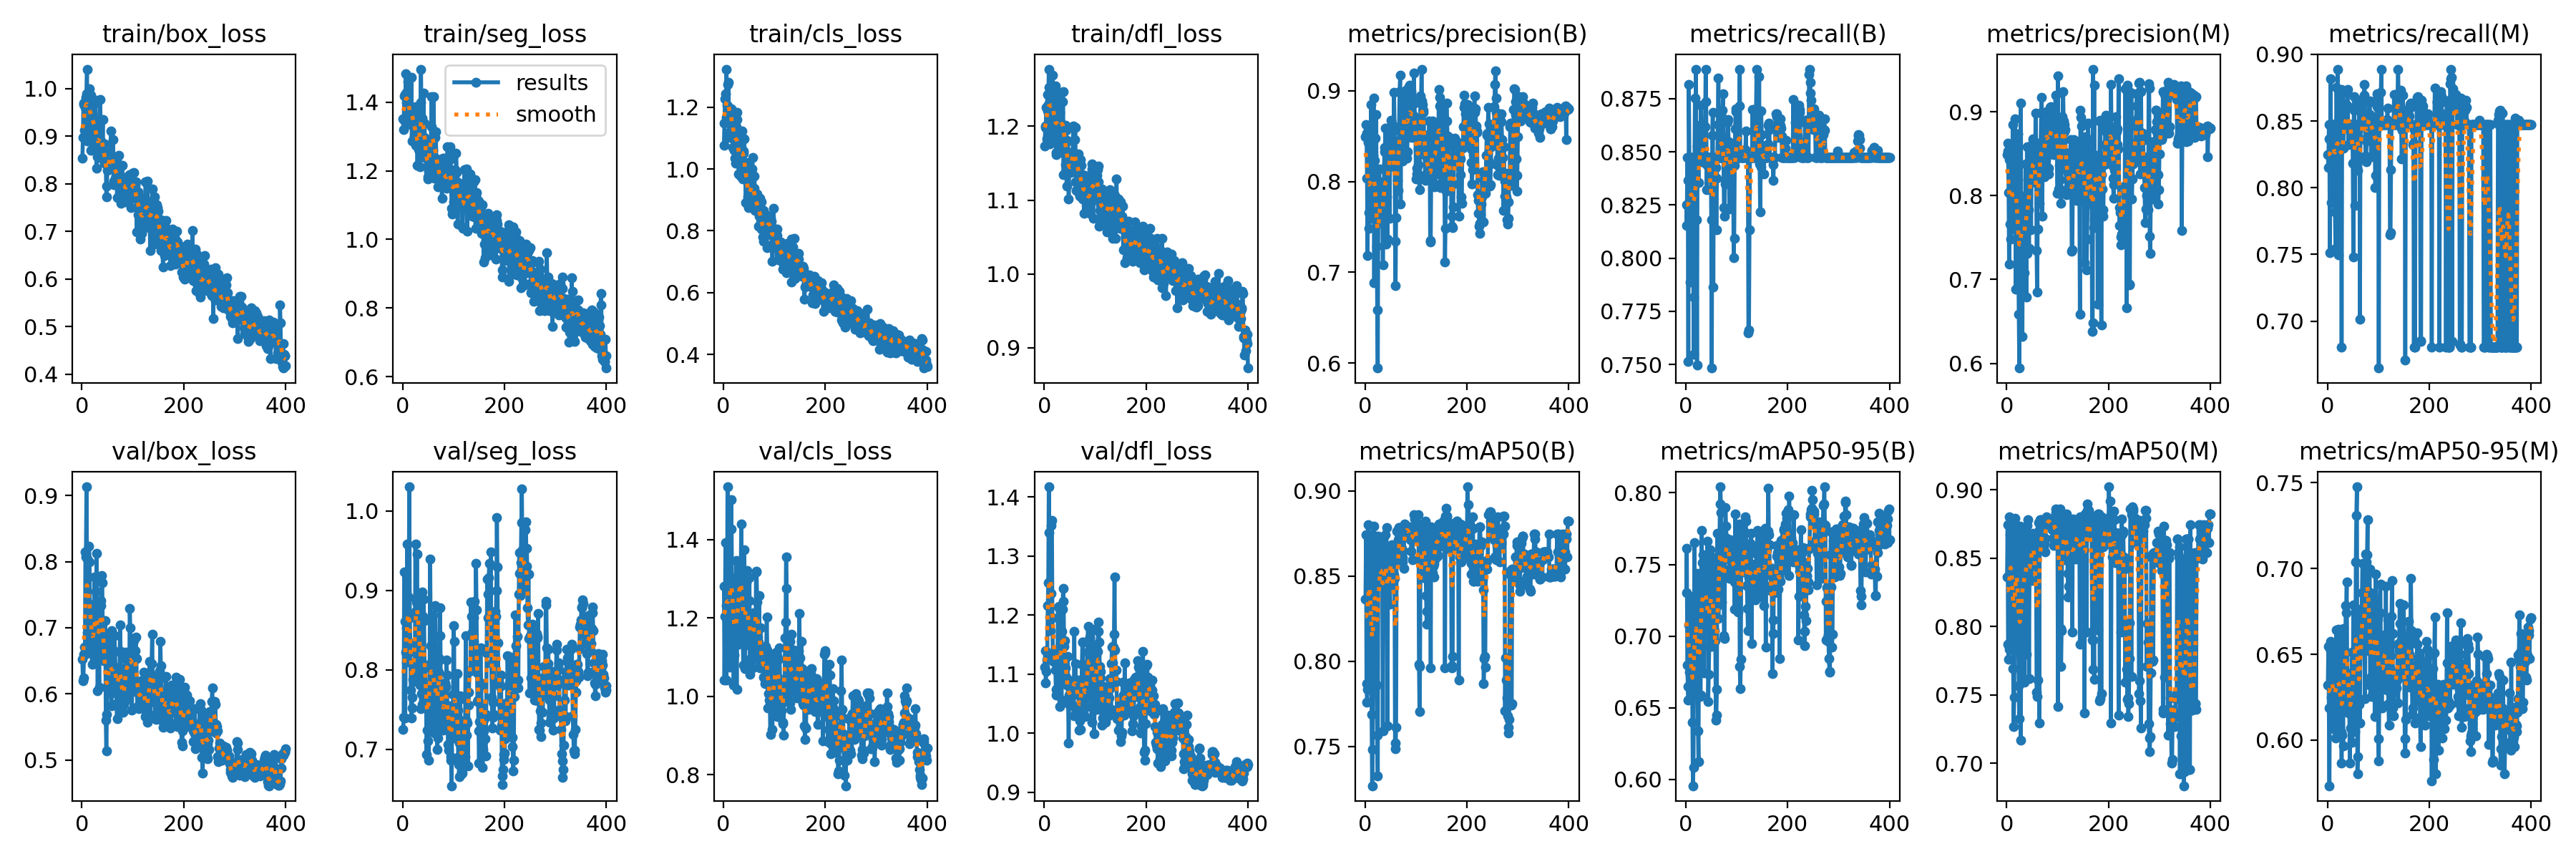

In [ ]:
Image("/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/results.png")

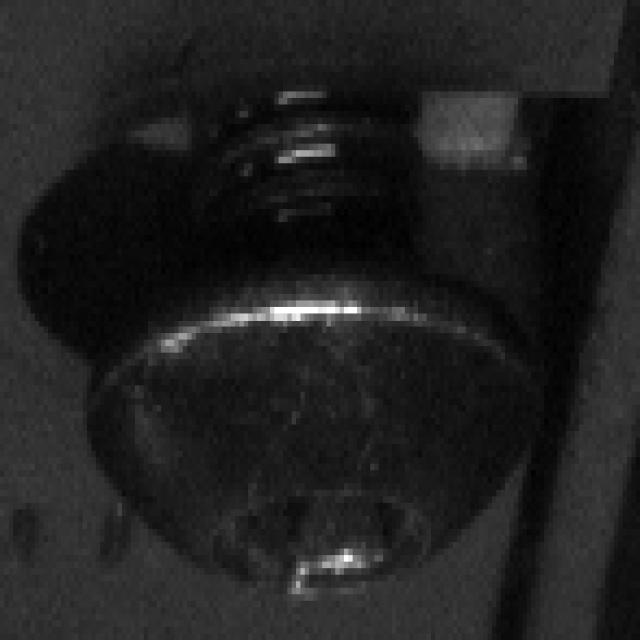

In [ ]:
Image(filename='/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/test/images/NG-10_bmp.rf.f779424ecda53289f1d9dc1173717a2d.jpg', width=900)

**Run inference**

Now that our model is trained, we can use it for inference.

You can load the best model or the latest. I am picking the latest.

In [5]:
my_new_model = YOLO('/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/best.pt')

Load an image and perform inference (segmentation).

In [14]:
new_image = '/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/train/images/OK-04_bmp.rf.60e737ec40753b4d4078c8328e6ecc65.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/train/images/OK-04_bmp.rf.60e737ec40753b4d4078c8328e6ecc65.jpg: 640x640 3 flat_oks, 979.1ms
Speed: 23.9ms preprocess, 979.1ms inference, 30.0ms postprocess per image at shape (1, 3, 640, 640)


The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

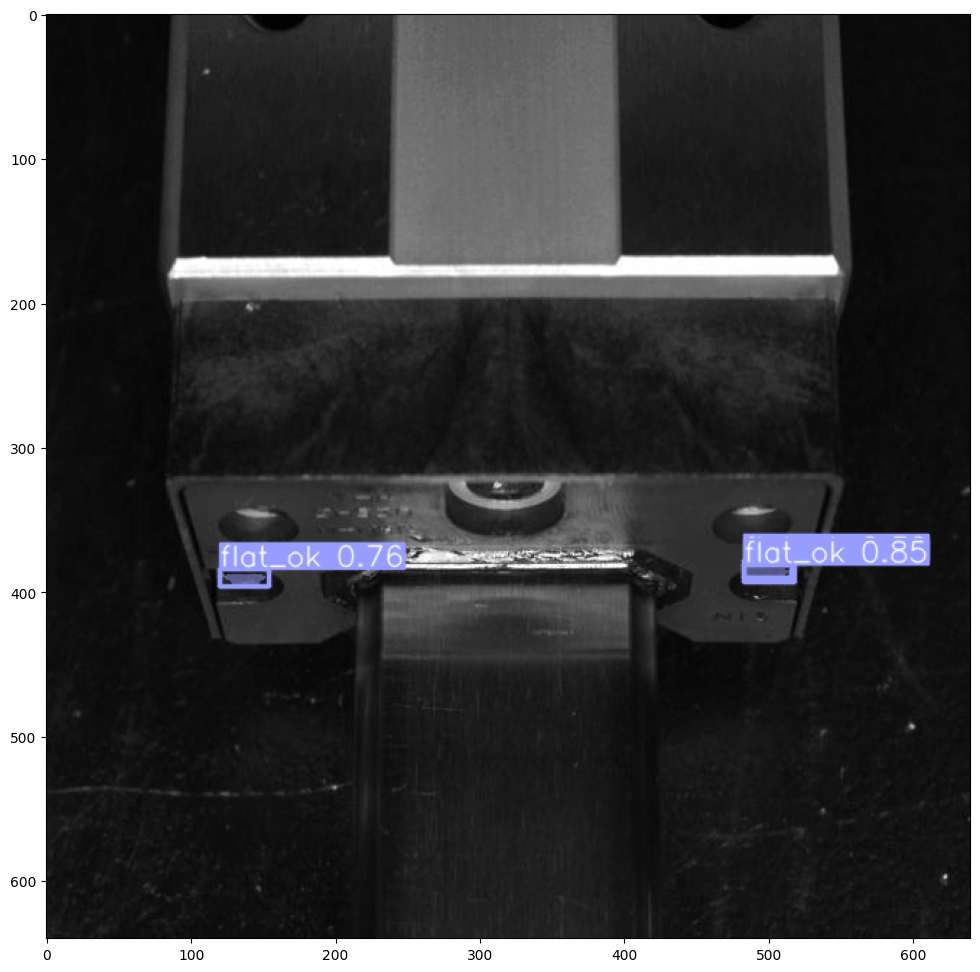

In [15]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

**Extracting bounding boxes and segmented masks from the result**

In [14]:
new_result = new_results[0]

In [15]:
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'flat_ng', 1: 'flat_ok', 2: 'hollow_nut_ng', 3: 'hollow_nut_ok', 4: 'plate_nut_ng', 5: 'plate_nut_ok'}
obb: None
orig_img: array([[[43, 43, 43],
        [43, 43, 43],
        [44, 44, 44],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [31, 31, 31]],

       [[44, 44, 44],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [30, 30, 30]],

       [[44, 44, 44],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [31, 31, 31]],

       ...,

       [[43, 43, 43],
        [43, 43, 43],
        [43, 43, 43],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [14, 14,

**Extracting bounding polygons** <p>
Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels)

In [24]:
new_result.masks.xy

[array([[        296,          84],
        [        295,          85],
        [        288,          85],
        ...,
        [        332,          85],
        [        328,          85],
        [        327,          84]], dtype=float32)]

In [19]:
new_result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9517])
data: tensor([[ 74.7100,  83.8931, 549.2637, 595.1114,   0.9517,   0.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[311.9868, 339.5023, 474.5536, 511.2183]])
xywhn: tensor([[0.4875, 0.5305, 0.7415, 0.7988]])
xyxy: tensor([[ 74.7100,  83.8931, 549.2637, 595.1114]])
xyxyn: tensor([[0.1167, 0.1311, 0.8582, 0.9299]])

**Extracting segmented masks**

In [ ]:
extracted_masks = new_result.masks.data

In [ ]:
extracted_masks.shape

torch.Size([1, 640, 640])

Push the mask to cpu (from GPU) and convert to numpy array for easy plotting.

In [ ]:
masks_array = extracted_masks.cpu().numpy()

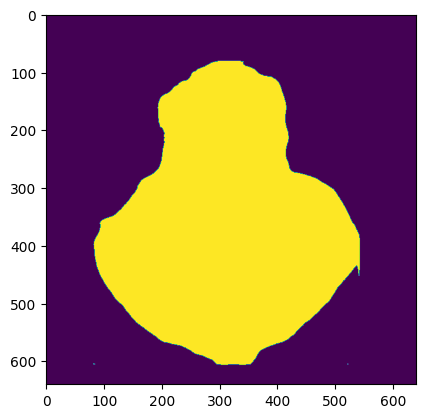

In [ ]:
plt.imshow(masks_array[0])

**Extracting labels for each class**

In [ ]:
class_names = new_result.names.values()
class_names

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


**Extracting masks for a specific class**

In [ ]:
alpha_granule_masks = masks_by_class['Alpha']
cell_masks = masks_by_class['Cells']

In [ ]:
# Extract the original image
orig_img = new_result.orig_img

In [ ]:
orig_img.shape

In [ ]:
# Display the original image
plt.imshow(orig_img, cmap='gray')

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.3)
plt.imshow(cell_masks[4], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()

**Calculating region properties for all objects and saving to a csv file.**

In [ ]:
import pandas as pd
from skimage.measure import regionprops

# Initialize a list to store the properties
props_list = []

# Iterate through all classes
for class_name, masks in masks_by_class.items():
    # Iterate through the masks for this class
    for mask in masks:
        # Convert the mask to an integer type if it's not already
        mask = mask.astype(int)

        # Apply regionprops to the mask
        props = regionprops(mask)

        # Extract the properties you want (e.g., area, perimeter) and add them to the list
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            # Add other properties as needed

            # Append the properties and class name to the list
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

# Convert the list of dictionaries to a DataFrame
props_df = pd.DataFrame(props_list)

# Now props_df contains the properties and class names for all regions

# Save the DataFrame to a CSV file
props_df.to_csv('/content/drive/MyDrive/ColabNotebooks/data/3D-EM-Platelet/YOLOv8_object_properties.csv', index=False)

In [ ]:
props_df

**Plotting results**

In [ ]:
import seaborn as sns


**Swarm plot**

In [ ]:

# Create the swarm plot with Seaborn
sns.swarmplot(x='Class Name', y='Area', data=props_df)

# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Box Plot**

In [ ]:
sns.boxplot(x='Class Name', y='Area', data=props_df)
# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Export model to ONNX for deployment.**

In [31]:
# Export the model
my_new_model.export(format='onnx', imgsz=[480,640], opset = 12, dynamic = False, simplify = True)


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/best.pt' with input shape (1, 3, 480, 640) BCHW and output shape(s) ((1, 42, 6300), (1, 32, 120, 160)) (6.5 MB)
requirements: Ultralytics requirements ['onnxsim>=0.4.33', 'onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 114.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 127.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.5s, installed 2 packages: ['onnxsim>=0.4.33', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 12...
ONNX: simplifying

'/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/best.onnx'

In [ ]:
import cv2

In [ ]:
net = cv2.dnn.readNetFromONNX('/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/results/200_epochs-3/weights/best.onnx')

In [ ]:
imag_name = "/content/drive/MyDrive/Colab_Notebooks/thk_shs_high_diagonal.v1i.yolov8/test/images/NG-11_bmp.rf.9bb961b57db4262a5696b0a19c3a78d9.jpg"
img = cv2.imread(imag_name)

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1/255 , (640, 640), swapRB=True, mean=(0,0,0), crop= False)
net.setInput(blob)
output_1, output_2 = net.forward(net.getUnconnectedOutLayersNames())

In [ ]:
output_1.shape

(1, 42, 8400)

In [ ]:
output_2.shape

(1, 32, 160, 160)

In [ ]:
output_1[0]

array([[     26.252,      40.225,      40.579, ...,      519.27,      527.07,      543.31],
       [     20.522,      20.285,      14.807, ...,       604.8,      603.28,      608.49],
       [     54.142,      81.616,      102.62, ...,      243.71,      225.85,      193.84],
       ...,
       [   0.082096,     0.18012,     0.21929, ...,    -0.34476,    -0.36496,    -0.38914],
       [  -0.084875,   -0.048744,   -0.096116, ...,      0.1782,     0.15276,     0.14519],
       [  -0.090193,   -0.059013,    -0.15622, ...,    -0.11905,   -0.068389,   -0.021413]], dtype=float32)

In [ ]:
# check_output_1_array = output_1.plot()
plt.figure(figsize = (12, 12))
plt.imshow(check_output_1_array)

NameError: name 'check_output_1_array' is not defined

<Figure size 1200x1200 with 0 Axes>

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)